# Train: 機械学習モデルを学習する

## なにをするのか

機械学習モデルを選択し、学習します。用途には例えば次のようなものがあります。

* 二値分類
* 多クラス分類
* 回帰

## なぜやるのか

Testで機械学習モデルの有用性を検証するために、学習済みの機械学習モデルが必要です。

## どうやるのか

モデルの選択、モデルの学習、学習のチューニングの3段階で進めます。モデルの選択は、Business Understandingで定めたゴールと、Preprocessで用意したデータに合わせて行います。

プログラミング演習ではモデルの選択と学習、コミュニケーション演習では選択と学習の妥当性を確認するためのコミュニケーションを学びます。

### プログラミング演習

#### モデルの選択

モデルの選択から行います。`scikit-learn`で提示されているフローチャートは、モデルを選択するのに役立ちます。近年はニューラルネットワークでなんでもできてしまう風潮がありますが、シンプルなモデルほど予測の根拠が分析しやすいためシンプルなモデルから始めることをお勧めします。

<img src="./images/05_train_001.PNG" alt="05_train_001.PNG" width=700></img>

今回は「データ量が50以上」、「分類ではない」、「数値を予測する」、「データ量が100,000以下」、「数個の特徴が予測に貢献する」ため、[`ElasticNet`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html)/[`Lasso`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html)に該当します。いずれも線形回帰のモデルです。モデルの詳細についてはハンズオンで詳しく触れませんが、`Lasso`の特性も含む`ElasticNet`を採用します。

学習するため、前処理済みのデータを読み込みます。

In [1]:
from pathlib import Path
import pandas as pd


train_data_path = Path("../data/processed/train.csv")
train_df = pd.read_csv(train_data_path)

きちんと読み込めていることを確認します。

In [2]:
train_df

,SalePrice,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,LandSlope,LotConfig,LotShape,MasVnrType,PavedDrive,RoofMatl,RoofStyle,SaleType,Street,Utilities
0,-0.656408,-0.864360,-0.181556,-0.270740,-0.756962,1.280027,-0.105076,0.951120,-0.001916,0.073507,...,1.0,5.0,4.0,2.0,3.0,2.0,4.0,9.0,2.0,1.0
1,-0.658088,-0.172398,-0.857978,-0.447101,0.803421,-0.506143,-1.303255,-1.647722,-0.559366,-0.952223,...,1.0,5.0,4.0,3.0,3.0,2.0,2.0,9.0,2.0,1.0
2,-0.622791,-0.864360,0.060023,-0.310631,-0.756962,-0.506143,-0.271490,-1.070201,-0.559366,-0.001713,...,1.0,5.0,4.0,3.0,3.0,2.0,4.0,9.0,2.0,1.0
3,-1.379166,-0.172398,-0.809662,-0.098682,-0.756962,-0.506143,-1.336538,-1.647722,-0.559366,-0.213697,...,1.0,5.0,4.0,3.0,3.0,2.0,2.0,9.0,2.0,1.0
4,-0.547153,0.750217,0.156654,0.041882,-1.537153,-0.506143,-0.071794,-0.781441,-0.559366,-0.952223,...,1.0,5.0,4.0,3.0,3.0,2.0,4.0,9.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
969,0.570601,-0.864360,0.204970,0.157882,0.803421,-0.506143,0.860123,0.566106,0.668276,0.620563,...,1.0,5.0,4.0,2.0,3.0,2.0,4.0,9.0,2.0,1.0
970,-0.698428,3.056755,-0.326504,-0.028663,-0.756962,1.280027,-1.003710,0.710486,-0.559366,-0.152153,...,1.0,5.0,4.0,3.0,3.0,2.0,2.0,9.0,2.0,1.0
971,0.520176,0.058255,-0.036609,0.000311,0.803421,0.386942,0.094620,-0.540808,0.943869,1.005781,...,1.0,1.0,1.0,4.0,3.0,2.0,2.0,9.0,2.0,1.0
972,-0.030465,1.442178,-1.244504,-0.773580,0.803421,-0.506143,1.159668,1.047373,-0.459150,-0.915752,...,1.0,5.0,4.0,2.0,3.0,2.0,2.0,7.0,2.0,1.0


#### モデルの学習

モデルの学習を行います。`scikit-learn`では`fit`するだけです。驚くほどシンプルですが、これで学習は完了です。

In [3]:
from sklearn.linear_model import ElasticNet


X = train_df.drop("SalePrice", axis=1)
y = train_df["SalePrice"]
model = ElasticNet(l1_ratio=0.05)
model.fit(X, y)

ElasticNet(l1_ratio=0.05)

`ElasticNet`は線形のモデルのため、入力データの各特徴に対する重みを持ちます。重みが大きいほど重要な特徴ということです。重みを可視化してみましょう。

<AxesSubplot:>

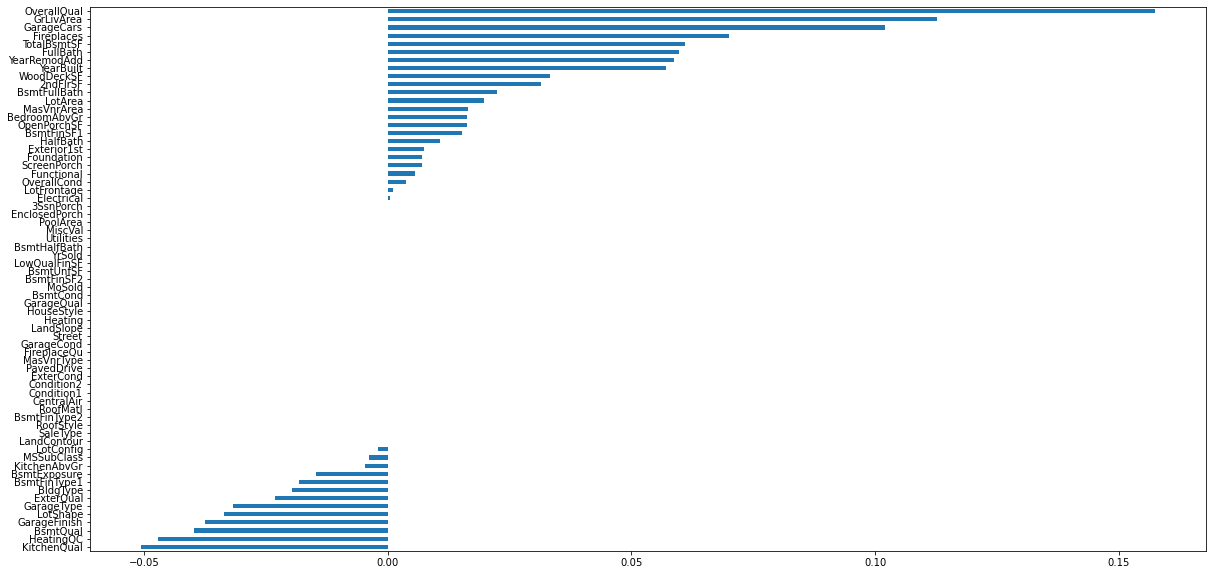

In [4]:
pd.Series(model.coef_, index=model.feature_names_in_).sort_values().plot.barh(figsize=(20, 10))

Analyzeの結果が示唆するように、OverallQualに重みがかかっていることが読み取れます。

*Exercise: 他のモデルでも学習してみましょう。 例: RandomForestRegressor*

※[RandomForestRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html)は、決定木という線形とは異なるタイプのモデルです。複数の分類モデルでデータを細かく分割していき、最終的な分割データの平均値を予測値とします。

In [5]:
from sklearn.ensemble import RandomForestRegressor


other_model = RandomForestRegressor(n_estimators=20, max_features='auto')
other_model.fit(X, y)

RandomForestRegressor(n_estimators=20)

<AxesSubplot:>

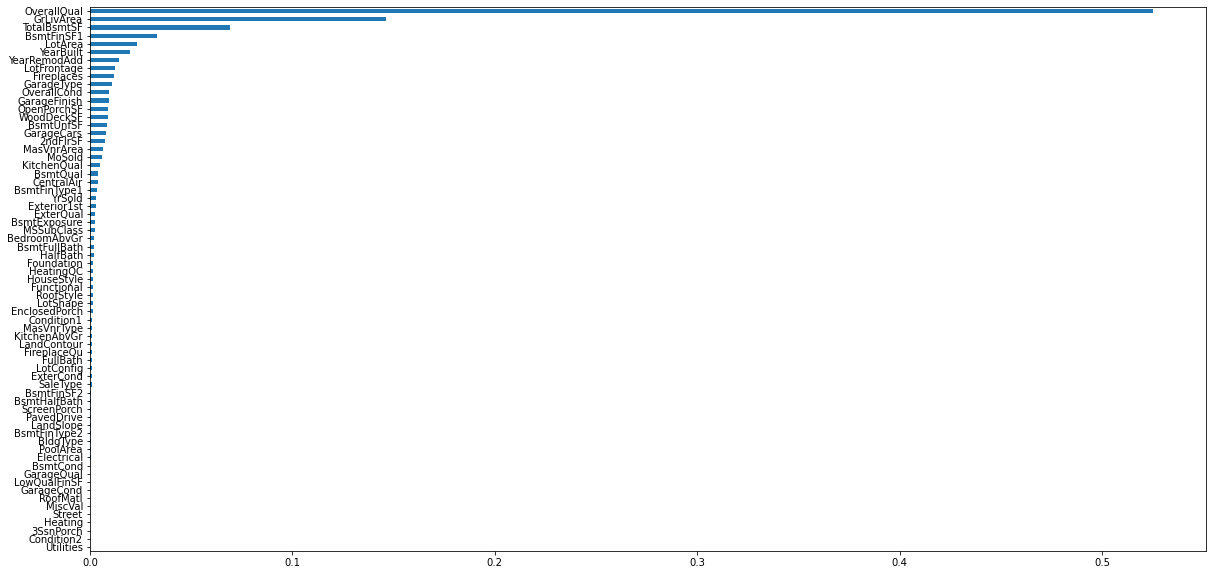

In [6]:
pd.Series(other_model.feature_importances_, index=X.columns).sort_values().plot.barh(figsize=(20, 10))

モデルの学習ができました。評価はTestで行うので、モデルを保存しておきます。

In [7]:
from joblib import dump


# 2つとも保存します。
model_dict = {"model": model, "other_model": other_model}
for model_name in model_dict:
    model_path = Path(f"../model/{model_name}.joblib")
    dump(model_dict[model_name], model_path)

今回は単にモデルを学習しましたが、学習を行う際は様々なパラメーターがあります。パラメーター次第で予測の精度が変わるため、問題に合わせた適切なパラメーターを探索することを**ハイパーパラメーターチューニング**と呼びます。

* モデルのパラメーター: 深層学習のモデルであれば、レイヤ数など。
* 学習のパラメーター: 勾配法であれば、学習率など。
* データのパラメーター: データの水増し手法を使っている場合、使う手法のバリエーションなど。

### コミュニケーション演習

プログラミング演習で次の手順で機械学習モデルの学習を行いました。学習の妥当性を確認するために誰に何を依頼すべきでしょうか。

* モデルの選択
* モデルの学習

ロールの種別

| 英語名             | 日本語名                   | 役割                                                                 |
|--------------------|----------------------------|------------------------------|
| Product Manager    | プロダクトマネージャー     | ユーザー体験を向上させるために実装すべきソフトウェア機能を定義する。 |
| Business Analyst   | ビジネスアナリスト         | 解決すべきビジネス上の問題を定義する                                 |
| Data Analyst       | データアナリスト           | データの可視化と分析で問題を定量的に特定する。                       |
| Architect          | アーキテクト               | ソフトウェアアーキテクチャ全体を設計する。                           |
| DevOps Engineer    | DevOpsエンジニア           | ソフトウェアの開発・運用プロセスを自動化する。                       |
| Software Engineer  | ソフトウェアエンジニア     | ソフトウェアの開発を行う。                                           |
| Operator           | 業務担当者                 | ソフトウェアを利用し業務を行う。                                     |
| System Admin       | システム管理者             | サービスの挙動を監視する。                                           |
| IT Auditor         | IT監督者                   | システムや会社全体の権限管理や監査を行う。                           |
| Data architect     | データアーキテクト         | データを管理する基盤を設計、運用する。                               |
| Domain Expert      | 業務有識者                 | 深い業務知識を持ちデータの意味やあるべき状態について定義する。       |
| Data Scientist     | データサイエンティスト     | 機械学習モデルを開発する。     

依頼の種別

* 情報共有: 開発に必要な情報/ドキュメントの提供を依頼する
* 作業: 開発に必要な作業を分担(依頼)する
* レビュー: 作業の確度を上げるため/承認を得るためレビューを依頼する

![communication](images/communication.PNG)

#### MLOpsチームへの依頼例

Data Scientistがいれば、次の依頼をするとよいでしょう。

* レビュー
   * モデルの選択、学習方法が適切か。

## AWS Empowerment

AWSでは、モデルの学習を行うためのマネージドサービスを提供しています。サービスを利用していただくことで、効率的な学習とチューニングが可能になります。

* [Amazon SageMaker Autopilot](https://aws.amazon.com/jp/sagemaker/autopilot/)
   * モデルの選択から学習、重要な特徴の評価まで自動で行ってくれます。作成したモデルのNotebookを生成できるため、ベースラインとなるモデルをサッと作成しあとは手動でチューニングするという使い方ができます。
* [Amazon SageMaker Jumpstart](https://aws.amazon.com/jp/sagemaker/jumpstart/)
   * ビルトインのアルゴリズムや事前学習済みモデルを選択し(転移)学習が素早く行えます。
* [Amazon SageMaker Model Training](https://docs.aws.amazon.com/sagemaker/latest/dg/how-it-works-training.html)
   * Training Jobを使ってモデルをトレーニングします。Training Jobはコンテナベースで処理を行い、データの場所(S3)、学習に使うコンピューティングインスタンス(EC2)、学習に使うコンテナ、学習後の結果出力先(S3)の4つを指定し起動します。学習が完了したら勝手に止まるため無駄がありません。
   * ML Enablement Series [Amazon SageMaker Training で機械学習のモデル開発を楽にする【ML-Dark-01】【AWS Black Belt】](https://youtu.be/byEawTm4O4E)をご参照ください。
* [Amazon SageMaker Debugger](https://aws.amazon.com/jp/sagemaker/debugger/)
   * 学習中のGPU/CPU使用率といったコンピューティングリソースの使用量、勾配の状況などをプロファイルしアラートを上げることができます。

## Next Step

[Test](06_test.ipynb)

## References

1. Sebastian Raschka, Vahid Mirjalili, 株式会社クイープ and 福島 真太朗. [Python機械学習プログラミング 達人データサイエンティストによる理論と実践 ](https://www.amazon.co.jp/dp/4844380605). 2020.
